<a href="https://colab.research.google.com/github/Naiker911/Content-based-recommendations/blob/main/%D0%94_%D0%97_%C2%AB%D0%A0%D0%B5%D0%BA%D0%BE%D0%BC%D0%B5%D0%BD%D0%B4%D0%B0%D1%86%D0%B8%D0%B8_%D0%BD%D0%B0_%D0%BE%D1%81%D0%BD%D0%BE%D0%B2%D0%B5_%D1%81%D0%BE%D0%B4%D0%B5%D1%80%D0%B6%D0%B0%D0%BD%D0%B8%D1%8F%C2%BB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Задание:
1. Использовать dataset MovieLens

2. Построить рекомендации (регрессия, предсказываем оценку) на фичах:

  a) TF-IDF на тегах и жанрах

  b) Средние оценки (+ median, variance, etc.) пользователя и фильма

3. Оценить RMSE на тестовой выборке

In [ ]:
import pandas as pd
import numpy as np
from collections import Counter
from datetime import datetime
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

In [ ]:
!wget 'https://drive.google.com/uc?id=1m0rwReR09achL0xTM6QPoN4tykz5bOMx' -O MovieLens.zip

--2023-06-21 11:55:17--  https://drive.google.com/uc?id=1m0rwReR09achL0xTM6QPoN4tykz5bOMx
Resolving drive.google.com (drive.google.com)... 173.194.174.139, 173.194.174.138, 173.194.174.100, ...
Connecting to drive.google.com (drive.google.com)|173.194.174.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0g-84-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/ulnvedgpsm4s88jfv46dunodn0ba3ic8/1687348500000/02611596255248067438/*/1m0rwReR09achL0xTM6QPoN4tykz5bOMx?uuid=c58a02a6-7d31-48ac-8e75-1080c9d788e0 [following]
--2023-06-21 11:55:18--  https://doc-0g-84-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/ulnvedgpsm4s88jfv46dunodn0ba3ic8/1687348500000/02611596255248067438/*/1m0rwReR09achL0xTM6QPoN4tykz5bOMx?uuid=c58a02a6-7d31-48ac-8e75-1080c9d788e0
Resolving doc-0g-84-docs.googleusercontent.com (doc-0g-84-docs.googleusercontent.com)... 64.233.187.132, 2404:6800:4008:c05::84
Connecting to do

In [ ]:
!unzip MovieLens.zip

Archive:  MovieLens.zip
  inflating: links.csv               
  inflating: movies.csv              
  inflating: ratings.csv             
  inflating: tags.csv                


In [ ]:
links = pd.read_csv('links.csv')
movies = pd.read_csv('movies.csv')
ratings = pd.read_csv('ratings.csv')
tags = pd.read_csv('tags.csv')

In [ ]:
grouped_users = tags['userId'].value_counts()

In [ ]:
print(f'Уникальных пользователей в датасете: {len(grouped_users)}')

Уникальных пользователей в датасете: 58


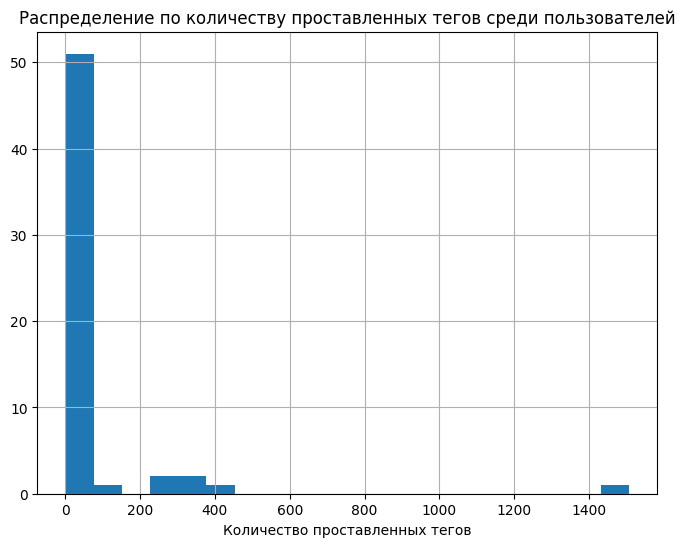

In [ ]:
plt.figure(figsize=[8,6])
grouped_users.hist(bins=20)
plt.title('Распределение по количеству проставленных тегов среди пользователей')
plt.xlabel('Число пользователей')
plt.xlabel('Количество проставленных тегов')
plt.show()

In [ ]:
grouped_movies = tags['movieId'].value_counts()

In [ ]:
print(f'Уникальных фильмов в датасете: {len(grouped_movies)}')

Уникальных фильмов в датасете: 1572


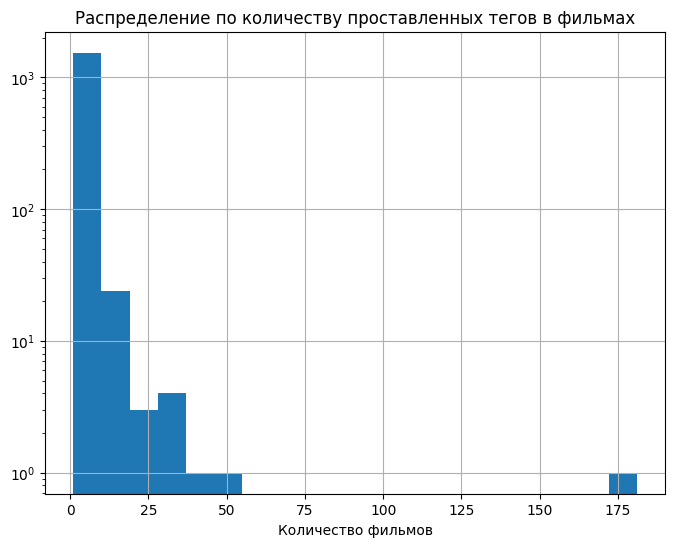

In [ ]:
plt.figure(figsize=[8,6])
grouped_movies.hist(bins=20, log = True)
plt.title('Распределение по количеству проставленных тегов в фильмах')
plt.xlabel('Число тегов')
plt.xlabel('Количество фильмов')
plt.show()

In [ ]:
def change_string(s):
    return ' '.join(s.replace(' ', '').replace('-', '').split('|'))

In [ ]:
movie_genres = [change_string(value) for value in movies.genres.values]

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tfidf = TfidfVectorizer()
movie_train_tfidf = tfidf.fit_transform(movie_genres)
movie_train_tfidf = pd.DataFrame(movie_train_tfidf.toarray(), columns=tfidf.get_feature_names_out())

In [ ]:
movies = movies.drop(columns=['genres', 'title'])
movies = pd.concat([movies, movie_train_tfidf], axis=1)

In [ ]:
movies.head()

,movieId,action,adventure,animation,children,comedy,crime,documentary,drama,fantasy,...,horror,imax,musical,mystery,nogenreslisted,romance,scifi,thriller,war,western
0,1,0.0,0.416846,0.516225,0.504845,0.267586,0.0,0.0,0.000000,0.482990,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,2,0.0,0.512361,0.000000,0.620525,0.000000,0.0,0.0,0.000000,0.593662,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,3,0.0,0.000000,0.000000,0.000000,0.570915,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.821009,0.0,0.0,0.0,0.0
3,4,0.0,0.000000,0.000000,0.000000,0.505015,0.0,0.0,0.466405,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.726241,0.0,0.0,0.0,0.0
4,5,0.0,0.000000,0.000000,0.000000,1.000000,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


In [ ]:
tag_strings = []
new_movies = []

for movie, group in tqdm(tags.groupby('movieId')):
    tag_strings.append(' '.join(set([change_string(str(s)) for s in group.tag.values])))
    new_movies.append(movie)

  0%|          | 0/1572 [00:00<?, ?it/s]

In [ ]:
tfidf_tag = TfidfVectorizer()
tag_train_tfidf = tfidf_tag.fit_transform(tag_strings)
tag_train_tfidf = pd.DataFrame(tag_train_tfidf.toarray(), columns=tfidf_tag.get_feature_names_out())

In [ ]:
new_tags = pd.concat([pd.DataFrame(new_movies, columns=['movieId']), tag_train_tfidf], axis=1)
new_tags.head()

,movieId,06oscarnominatedbestmovieanimation,1900s,1920s,1950s,1960s,1970s,1980s,1990s,2001like,...,worldwari,worldwarii,writing,wrongfulimprisonment,wry,youngermen,zither,zoekazan,zombies,zooeydeschanel
0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
movies_with_tags = movies.merge(new_tags, on='movieId')
movies_with_tags.dropna(inplace=True)
movies_with_tags.head()

,movieId,action_x,adventure_x,animation_x,children_x,comedy_x,crime_x,documentary_x,drama_x,fantasy_x,...,worldwari,worldwarii,writing,wrongfulimprisonment,wry,youngermen,zither,zoekazan,zombies,zooeydeschanel
0,1,0.0,0.416846,0.516225,0.504845,0.267586,0.0,0.0,0.0,0.482990,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,0.0,0.512361,0.000000,0.620525,0.000000,0.0,0.0,0.0,0.593662,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,0.0,0.000000,0.000000,0.000000,0.570915,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5,0.0,0.000000,0.000000,0.000000,1.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,7,0.0,0.000000,0.000000,0.000000,0.570915,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Добавим в датасет новые признаки:
  1. среднюю оценку фильма
  2. среднюю оценку пользователя

In [ ]:
movies_with_ratings = movies_with_tags.merge(ratings, on='movieId').drop(columns=['timestamp'])
movies_with_ratings.head()

,movieId,action_x,adventure_x,animation_x,children_x,comedy_x,crime_x,documentary_x,drama_x,fantasy_x,...,writing,wrongfulimprisonment,wry,youngermen,zither,zoekazan,zombies,zooeydeschanel,userId,rating
0,1,0.0,0.416846,0.516225,0.504845,0.267586,0.0,0.0,0.0,0.48299,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,4.0
1,1,0.0,0.416846,0.516225,0.504845,0.267586,0.0,0.0,0.0,0.48299,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,4.0
2,1,0.0,0.416846,0.516225,0.504845,0.267586,0.0,0.0,0.0,0.48299,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7,4.5
3,1,0.0,0.416846,0.516225,0.504845,0.267586,0.0,0.0,0.0,0.48299,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15,2.5
4,1,0.0,0.416846,0.516225,0.504845,0.267586,0.0,0.0,0.0,0.48299,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17,4.5


In [ ]:
mean_movie_rating = movies_with_ratings.groupby('movieId')['rating'].mean()
mean_user_rating = movies_with_ratings.groupby('userId')['rating'].mean()

In [ ]:
movies_with_ratings['mean_movie_rating'] = movies_with_ratings['movieId'].apply(lambda x: mean_movie_rating[x])

In [ ]:
movies_with_ratings['mean_user_rating'] = movies_with_ratings['userId'].apply(lambda x: mean_user_rating[x])

In [ ]:
movies_with_ratings.head()

,movieId,action_x,adventure_x,animation_x,children_x,comedy_x,crime_x,documentary_x,drama_x,fantasy_x,...,wry,youngermen,zither,zoekazan,zombies,zooeydeschanel,userId,rating,mean_movie_rating,mean_user_rating
0,1,0.0,0.416846,0.516225,0.504845,0.267586,0.0,0.0,0.0,0.48299,...,0.0,0.0,0.0,0.0,0.0,0.0,1,4.0,3.92093,4.403509
1,1,0.0,0.416846,0.516225,0.504845,0.267586,0.0,0.0,0.0,0.48299,...,0.0,0.0,0.0,0.0,0.0,0.0,5,4.0,3.92093,3.743590
2,1,0.0,0.416846,0.516225,0.504845,0.267586,0.0,0.0,0.0,0.48299,...,0.0,0.0,0.0,0.0,0.0,0.0,7,4.5,3.92093,3.543956
3,1,0.0,0.416846,0.516225,0.504845,0.267586,0.0,0.0,0.0,0.48299,...,0.0,0.0,0.0,0.0,0.0,0.0,15,2.5,3.92093,3.562500
4,1,0.0,0.416846,0.516225,0.504845,0.267586,0.0,0.0,0.0,0.48299,...,0.0,0.0,0.0,0.0,0.0,0.0,17,4.5,3.92093,4.279070


Обучение модели с TF-IDF

In [ ]:
X = movies_with_ratings.drop(columns=['rating'])
y = pd.DataFrame(movies_with_ratings['rating'])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
sc_x = StandardScaler()
sc_y = StandardScaler()
X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_std, y_std, test_size=0.2, random_state=21)

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression

In [ ]:
model = Ridge(alpha=0.1)
model.fit(X_train, y_train)

Ridge(alpha=0.1)

In [ ]:
pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
np.sqrt(mean_squared_error(y_test, pred))

0.8372297363654065

Обучение модели без TF-IDF

In [ ]:
X = movies_with_ratings[['movieId', 'userId', 'mean_movie_rating', 'mean_user_rating']]
y = movies_with_ratings['rating']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
pred = model.predict(X_test)
np.sqrt(mean_squared_error(y_test, pred))

0.7961733250369376

Выводы:

Были произведены преобразования данных в вектора (TF-IDF) для признаков genre и tag. Также были добавлены новые признаки средняя оценка для фильма и средняя оценка пользователя. На основе них были обучены линейные модели как с использованием преобразованных данных TF-IDF, так и только на основании средних оценок. в качестве метрики для оценки качества модели использовался RMSE.

Были получены почти идентичные значения:

 1. модель с TF-IDF: RMSE = 0.8372297363654065
 2. модель без TF-IDF: RMSE = 0.7961733250369376

Можно сказать, что мы получили достаточно неплохое качество модели для предсказания рейтинга, выставленное пользователем фильму.